# Customer Segmentation using K-means Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
#Load the customer segmentation dataset from Kaggle
data = pd.read_csv('Test.csv')

In [4]:
#Clean the data by removing any duplicates, and missing values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)


In [5]:
# Encode categorical features
le = LabelEncoder()
# apply LabelEncoder to all categorical features
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [6]:
#Scaling the features using standardization.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#irrelevent columns dropped
scaled_data = scaler.fit_transform(data.drop(columns=['ID', 'Var_1']))


In [7]:
#Select the relevant features using the SelectKBest method from scikit-learn
# Select the top 2 features as we'll visualize in 2D
selector = SelectKBest(f_classif, k=2)
selector.fit(scaled_data, data['Var_1'])
p_data = selector.transform(scaled_data)


In [8]:
selected_features = np.array(data.columns.drop(['ID', 'Var_1']))[selector.get_support()]
print(selected_features)

['Age' 'Family_Size']


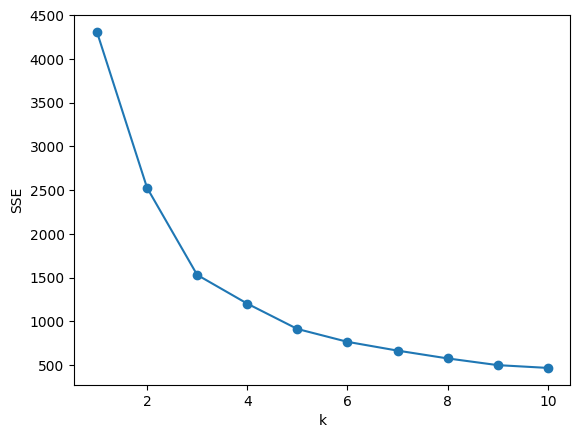

In [9]:

#Applying K-means clustering on various k values and choosing the most optimal using elbow method
# Calculate the intra-cluster variance for each K value
variance_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(p_data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    variance = 0
    for i in range(k):
        variance += np.sum((p_data[labels == i] - centers[i]) ** 2)
    variance_values.append(variance)

plt.plot(k_range, variance_values, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


In [13]:
optimal_k = 5  # the optimal number of clusters based on the elbow point

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
kmeans.fit(p_data)

# Assign the cluster labels to the data points
cluster_labels = kmeans.labels_

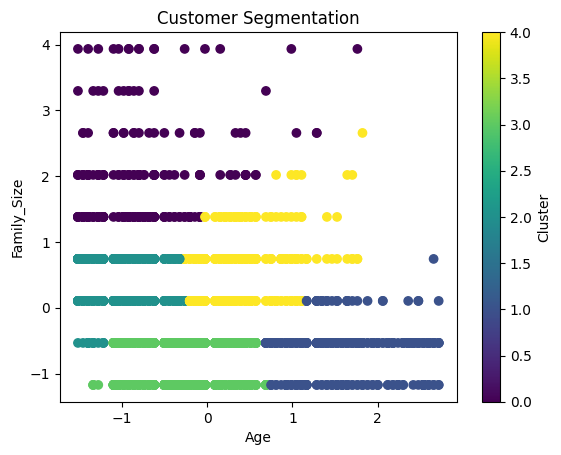

In [15]:
# Plot the data points colored by their assigned cluster labels
plt.scatter(p_data[:, 0], p_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Customer Segmentation')
plt.show()